# 数据清洗和可视化分析

## 问题1：将30个城市的AQI整理到一张表中

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data = pd.DataFrame()
path = r'..\AQI_maincity'
for filename in os.listdir(path):
    dirname = os.path.join(path, filename)  # 路径
    cityname = filename.split('.')[0]  # 城市名
    with open(dirname, 'rb') as f:
        df = pd.read_csv(f, usecols=[0,1], index_col='date', encoding='utf-8')
        df.rename(columns={'AQI': cityname}, inplace=True)
    data = pd.concat([data, df], axis=1, sort=False)
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index.name = 'date'
data.head()

,上海,乌鲁木齐,兰州,北京,南京,南宁,南昌,合肥,哈尔滨,天津,...,石家庄,福州,西宁,西安,贵阳,郑州,重庆,银川,长春,长沙
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,195,196.0,158.0,81.0,177,205,159,166,141.0,131,...,85.0,75.0,84.0,120.0,139,94,149,72.0,50,195.0
2014-01-02,147,184.0,99.0,145.0,209,182,171,220,131.0,146,...,205.0,84.0,64.0,117.0,142,113,176,69.0,75,197.0
2014-01-03,189,248.0,96.0,74.0,255,185,136,205,191.0,109,...,138.0,102.0,85.0,92.0,110,76,209,59.0,118,260.0
2014-01-04,151,251.0,121.0,149.0,221,209,93,252,247.0,69,...,229.0,121.0,72.0,112.0,122,121,206,57.0,142,154.0
2014-01-05,65,132.0,116.0,119.0,255,203,132,246,412.0,121,...,274.0,206.0,82.0,201.0,151,139,210,76.0,245,158.0


In [3]:
# 处理缺失值
print('存在缺失值的行数：', data[data.isna().values==True].shape[0])
data.dropna(axis=0, how='any', inplace=True)
print(np.all(data.notna()))

存在缺失值的行数： 29
True


In [4]:
# 保存文件
data = data.astype(np.int64)
data.to_csv('maincity_aqi.csv', encoding='utf-8')

## 问题2：武汉空气质量的季节分布

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

1.描述性统计信息

In [6]:
# 导入数据
wh_data = pd.read_csv('../AQI_maincity/武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data.head()

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h
date,,,,,,,,
2014-01-01,203,重度污染,153,210,70,2.0,106,55
2014-01-02,231,重度污染,181,254,89,2.4,112,26
2014-01-03,224,重度污染,174,226,63,1.7,84,55
2014-01-04,147,轻度污染,112,184,73,1.6,87,40
2014-01-05,195,中度污染,147,213,89,2.2,91,53


In [7]:
# 数据结构等基本信息
wh_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 2014-01-01 to 2018-12-31
Data columns (total 8 columns):
AQI      1824 non-null int64
质量等级     1824 non-null object
PM2.5    1824 non-null int64
PM10     1824 non-null int64
SO2      1824 non-null int64
CO       1824 non-null float64
NO2      1824 non-null int64
O3_8h    1824 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 128.2+ KB


In [8]:
# 描述性统计
wh_data.describe()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,96.055373,60.781250,93.794408,16.493969,1.089474,48.824013,92.230263
std,47.972836,41.361654,51.720874,13.134645,0.349483,20.207434,48.980620
min,0.000000,0.000000,0.000000,2.000000,0.400000,13.000000,0.000000
25%,64.000000,32.000000,56.000000,7.000000,0.900000,33.000000,53.000000
50%,88.000000,51.000000,86.000000,13.000000,1.000000,45.000000,87.000000
75%,115.000000,78.000000,122.000000,21.000000,1.300000,61.000000,128.000000
max,500.000000,287.000000,406.000000,107.000000,2.700000,119.000000,261.000000


2.各季节质量等级分布情况。

In [9]:
# 季节分类
def get_season(date):
    if date.split('-')[1] in ['03', '04', '05']:
        return 'spring'
    elif date.split('-')[1] in ['06', '07', '08']:
        return 'summer'
    elif date.split('-')[1] in ['09', '10', '11']:
        return 'fall'
    else:
        return 'winter'

In [10]:
wh_data['datestr'] = wh_data.index
wh_data['Season'] = wh_data.datestr.apply(get_season)
wh_data.drop('datestr', axis=1, inplace=True)
wh_data.head()

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h,Season
date,,,,,,,,,
2014-01-01,203,重度污染,153,210,70,2.0,106,55,winter
2014-01-02,231,重度污染,181,254,89,2.4,112,26,winter
2014-01-03,224,重度污染,174,226,63,1.7,84,55,winter
2014-01-04,147,轻度污染,112,184,73,1.6,87,40,winter
2014-01-05,195,中度污染,147,213,89,2.2,91,53,winter


In [11]:
# 季节分组
wh_season = {}
for season, group in wh_data.groupby(['Season'], sort=False):
    wh_season[season] = group

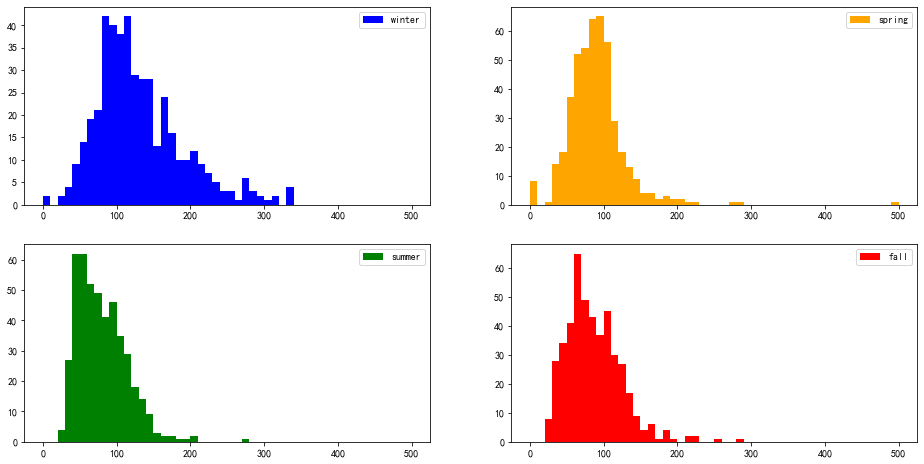

In [12]:
# 各季节直方图
fig, axes = plt.subplots(2,2, figsize=(16,8))
axes[0,0].hist(wh_season['winter'].AQI, bins=50, range=(0,500), label='winter', color='blue')
axes[0,0].legend()
axes[0,1].hist(wh_season['spring'].AQI, bins=50, range=(0,500), label='spring', color='orange')
axes[0,1].legend()
axes[1,0].hist(wh_season['summer'].AQI, bins=50, range=(0,500), label='summer', color='green')
axes[1,0].legend()
axes[1,1].hist(wh_season['fall'].AQI, bins=50, range=(0,500), label='fall', color='red')
axes[1,1].legend()
plt.show()

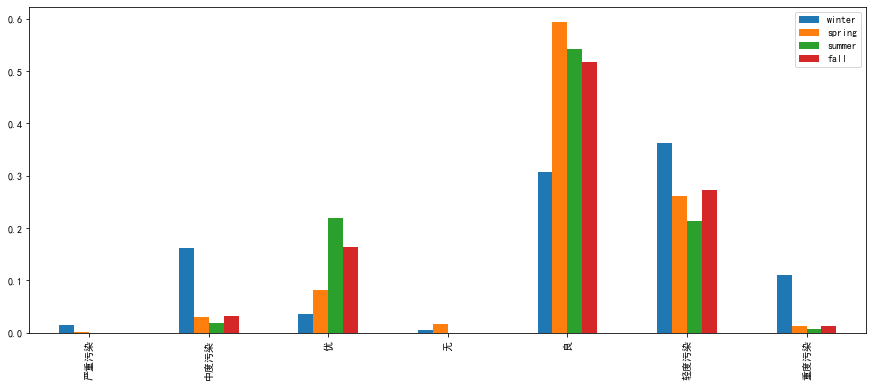

In [13]:
winter_grade = wh_season['winter'].groupby('质量等级').size() / len(wh_season['winter'])
spring_grade = wh_season['spring'].groupby('质量等级').size() / len(wh_season['spring'])
summer_grade = wh_season['summer'].groupby('质量等级').size() / len(wh_season['summer'])
fall_grade = wh_season['fall'].groupby('质量等级').size() / len(wh_season['fall'])

season_grade = pd.concat([winter_grade,spring_grade,summer_grade,fall_grade], axis=1, sort=False)
season_grade.columns = [ 'winter','spring','summer', 'fall']
season_grade.plot.bar(figsize=(15,6))
plt.show()

In [14]:
season_grade.loc[['优', '良']].sum().sort_values(ascending=False)

summer    0.760870
fall      0.681319
spring    0.676087
winter    0.342984
dtype: float64